## Import libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import time
from sklearn.metrics import balanced_accuracy_score

## Data preprocessing

In [2]:
# Import Dataset

df = pd.read_csv('Group_12_data_cleaned.csv') 
df.head()

,Unnamed: 0,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,A
1,1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,A
4,4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F


In [3]:
# Check the statistics of dataset

df.describe()

,Unnamed: 0,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number
count,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,5216.250587,-0.038164,-0.057172,-0.009766,0.000115,0.204178,-0.004961,0.040236,-0.000634,0.002551
std,3011.965191,0.793469,0.480454,0.965513,0.999997,0.319982,0.968284,0.782209,0.995826,0.993220
min,0.000000,-3.498799,-2.426761,-3.210528,-5.440122,-1.078955,-4.128270,-4.876130,-4.247781,-4.238959
25%,2608.000000,-0.128929,-0.259834,0.064919,-0.527256,0.082961,-0.598658,-0.044076,-0.543914,-0.372457
50%,5216.000000,0.043885,-0.055704,0.214288,0.089437,0.261718,-0.058835,0.220177,0.108221,0.064084
75%,7824.500000,0.204355,0.203385,0.352988,0.643738,0.261718,0.564038,0.446679,0.648376,0.500624
max,10436.000000,4.969080,3.846334,5.491990,3.987152,1.066121,3.969075,3.995218,4.580832,3.244594


In [4]:
# Check data format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20867 entries, 0 to 20866
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              20867 non-null  int64  
 1   intercolumnar distance  20867 non-null  float64
 2   upper margin            20867 non-null  float64
 3   lower margin            20867 non-null  float64
 4   exploitation            20867 non-null  float64
 5   row number              20867 non-null  float64
 6   modular ratio           20867 non-null  float64
 7   interlinear spacing     20867 non-null  float64
 8   weight                  20867 non-null  float64
 9   peak number             20867 non-null  float64
 10  monk                    20867 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.8+ MB


In [5]:
# Drop the first index column

df = df.drop(columns=['Unnamed: 0'])
df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F


In [6]:
df['monk'].value_counts()

A    8572
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: monk, dtype: int64

In [7]:
# Categorize monk variable to numerical categorical values

df['monk'].replace(['A', 'F','E','I','X','H','G','D','Y','C','W','B'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)
df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0
3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,1


## Grid Search to find optimal parameters for KNN

In [8]:
# Split data to features and labels

X = df.drop(columns=['monk'])
y = df['monk']

In [9]:
# Split data to training and testing sets

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [10]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='balanced_accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.864382 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.754751 (0.019573) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.754751 (0.019573) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.686916 (0.033104) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.737738 (0.021877) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.623366 (0.033105) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.697334 (0.039537) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.588712 (0.033363) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.658960 (0.042204) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.546967 (0.014293) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.629388 (0.036224) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.526800 (

## Optimal feature selection

In [11]:
# Combinations of variables
# We make a list of combinations of 5 variables out of 10 

Z = df.drop(['monk'], axis=1)
val = Z.columns.tolist()
comb = []

for i in combinations(val, 5):
    comb_list = list(i) #nCr
    comb.append(comb_list)

#variable_comb = random.sample(comb, 0)
print(comb)

[['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number'], ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'modular ratio'], ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'interlinear spacing'], ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'weight'], ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'peak number'], ['intercolumnar distance', 'upper margin', 'lower margin', 'row number', 'modular ratio'], ['intercolumnar distance', 'upper margin', 'lower margin', 'row number', 'interlinear spacing'], ['intercolumnar distance', 'upper margin', 'lower margin', 'row number', 'weight'], ['intercolumnar distance', 'upper margin', 'lower margin', 'row number', 'peak number'], ['intercolumnar distance', 'upper margin', 'lower margin', 'modular ratio', 'interlinear spacing'], ['intercolumnar distance', 'upper margin', 'lower margin', 'modular ratio', 'we

In [12]:
min_mean = 0

for j in comb:
    features = Z[j]
    model = KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform') # best values from grid search
    model.fit(features, y)
    y_pred = model.predict(features)
    cm = confusion_matrix(y, y_pred)
#     accuracy = []
    acc = balanced_accuracy_score(y, y_pred)
#     temp1 = cm[0]
#     accuracy.append((temp1[0]/(temp1[0]+temp1[1])*100))
#     temp2 = cm[1]
#     accuracy.append((temp2[1]/(temp2[0]+temp2[1])*100))
#     P = (accuracy[0]/2)+(accuracy[1]/2) # criteria given in assignment
    if acc > min_mean: # Checking that we have the highest accuracy of all.
        min_mean = acc
        final_features = j
    else:
        continue
            
print('Optimized Variables Producing highest accuracy:\n',final_features)
print('Balanced Accuracy:', min_mean)

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

Optimized Variables Producing highest accuracy:
 ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'weight']
Balanced Accuracy: 1.0


## Best model from part 2 (Random Forests) with optimal hyperparameters

In [13]:
X_s = df[final_features]
y_s = df['monk']

In [14]:
# Split data to training and testing sets

x_s_train, x_s_test, y_s_train, y_s_test=train_test_split(X_s,y_s,test_size=0.3)

In [15]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 1000, max_features = 'log2')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_s_train, y_s_train)
  
# performing predictions on the test dataset
y_s_pred = clf.predict(x_s_test)


rf_clr = classification_report(y_s_test, y_s_pred)
print(rf_clr)

rf_feature = classification_report(y_s_test, y_s_pred, output_dict = True)
%store rf_feature

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2589
           1       1.00      1.00      1.00      1176
           2       1.00      0.99      1.00       645
           3       1.00      0.99      1.00       485
           4       0.99      1.00      0.99       291
           5       0.99      0.99      0.99       314
           6       1.00      0.99      1.00       300
           7       1.00      1.00      1.00       213
           8       0.99      0.99      0.99       167
           9       1.00      0.94      0.97        47
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00         4

    accuracy                           1.00      6261
   macro avg       1.00      0.99      0.99      6261
weighted avg       1.00      1.00      1.00      6261

Stored 'rf_feature' (dict)


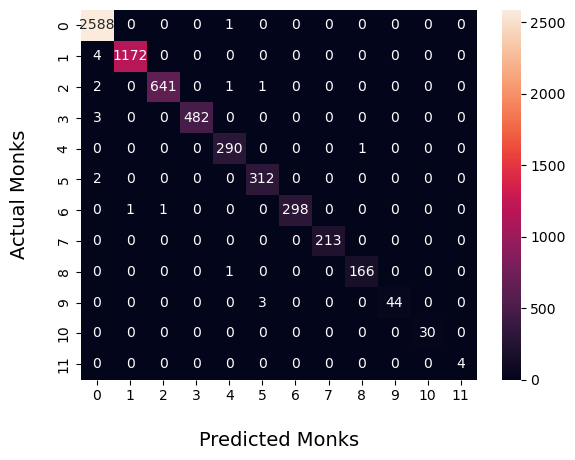

In [16]:
# Plot confusion matrix

confusion_matrix = metrics.confusion_matrix(y_s_test, y_s_pred)

ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', )

# set x and y label
ax.set_xlabel("Predicted Monks", fontsize=14, labelpad=20)
ax.set_ylabel("Actual Monks", fontsize=14, labelpad=20)
plt.savefig('rf_cm_knn.png')

## Best model from part 3 (Non-Linear SVM) with optimal hyperparameters

In [17]:
svm = SVC(kernel='rbf',gamma=0.1, C=1000)
start_time = time.time()
svm.fit(x_s_train, y_s_train)
train_time = time.time() - start_time
print("--- Training Time: %s seconds ---" %train_time)

--- Training Time: 41.18418788909912 seconds ---


In [18]:
y_s_pred = svm.predict(x_s_test)
svm_clr = classification_report(y_s_test, y_s_pred)
print(svm_clr)

nl_svm_feature = classification_report(y_s_test, y_s_pred, output_dict = True)
%store nl_svm_feature

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      2589
           1       0.77      0.47      0.58      1176
           2       0.70      0.78      0.74       645
           3       0.95      0.93      0.94       485
           4       0.80      0.76      0.78       291
           5       0.69      0.59      0.64       314
           6       0.62      0.64      0.63       300
           7       0.92      0.59      0.72       213
           8       0.93      0.86      0.89       167
           9       0.86      0.89      0.88        47
          10       1.00      0.97      0.98        30
          11       1.00      1.00      1.00         4

    accuracy                           0.75      6261
   macro avg       0.83      0.78      0.80      6261
weighted avg       0.76      0.75      0.74      6261

Stored 'nl_svm_feature' (dict)


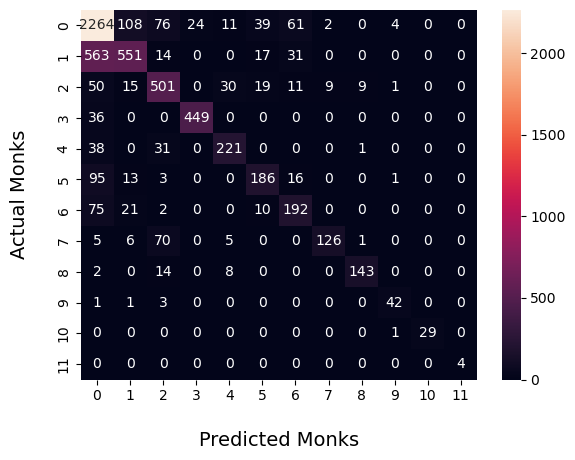

In [19]:
# Plot confusion matrix

confusion_matrix = metrics.confusion_matrix(y_s_test, y_s_pred)

ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', )

# set x and y label
ax.set_xlabel("Predicted Monks", fontsize=14, labelpad=20)
ax.set_ylabel("Actual Monks", fontsize=14, labelpad=20)
plt.savefig('nl_svm_cm_knn.png')